In [1]:
import sys
sys.path.insert(0, "../..")

import numpy as np
from matplotlib import pyplot as plt

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

In [4]:
net_sizes = np.arange(2, 11)
size_index = 1

In [10]:
N = net_sizes[size_index]
size_str = str(N) + "x" + str(N) + ".csv"

## Load MF data
mf_states = np.loadtxt("../../data/large_sys/sorted/mf/mf_states" + size_str) / CONST.electron_charge
mf_convergence = np.loadtxt("../../data/large_sys/sorted/mf/mf_convergence" + size_str)
mf_currents = np.loadtxt("../../data/large_sys/sorted/mf/mf_currents" + size_str)

## Load MF2 data
mf2_means = np.loadtxt("../../data/large_sys/sorted/mf2/mf2_means" + size_str)
mf2_currents = np.loadtxt("../../data/large_sys/sorted/mf2/mf2_currents" + size_str)

## Load KMC data
kmc_states = np.loadtxt("../../data/large_sys/sorted/kmc/kmc_states" + size_str) / CONST.electron_charge
kmc_steps = np.loadtxt("../../data/large_sys/sorted/kmc/kmc_steps" + size_str)
kmc_currents = np.loadtxt("../../data/large_sys/sorted/kmc/kmc_currents" + size_str)
kmc_errs = np.loadtxt("../../data/large_sys/sorted/kmc/kmc_errs" + size_str)

## valid indices
cond = np.logical_and(kmc_currents > 0.01, kmc_steps < 2e7)
cond = np.logical_and(cond, mf_convergence < 1e-3)
valid_indices = np.where(cond)[0]

In [12]:
MAE = np.mean(np.abs(mf_states - kmc_states), axis = - 1)
rel_err = np.abs((mf_currents - kmc_currents)/kmc_currents)

In [13]:
MAE2 = np.mean(np.abs(mf2_means - kmc_states), axis = - 1)
rel_err2 = np.abs((mf2_currents - kmc_currents)/kmc_currents)

In [15]:
MAE2_result = np.mean(MAE2[valid_indices])
rel_err2_result = np.mean(rel_err2[valid_indices])
print("MAE:", MAE2_result, "electron charges")
print("rel_err:", rel_err2_result*100, "%")

MAE: 2.209755093681353 electron charges
rel_err: 0.06875377659445048 %


In [16]:
MAE_result = np.mean(MAE[valid_indices])
rel_err_result = np.mean(rel_err[valid_indices])
print("MAE:", MAE_result, "electron charges")
print("rel_err:", rel_err_result*100, "%")

MAE: 0.04884074042800681 electron charges
rel_err: 0.08134248500939781 %


Text(0.5, 1.0, 'correlations of errors')

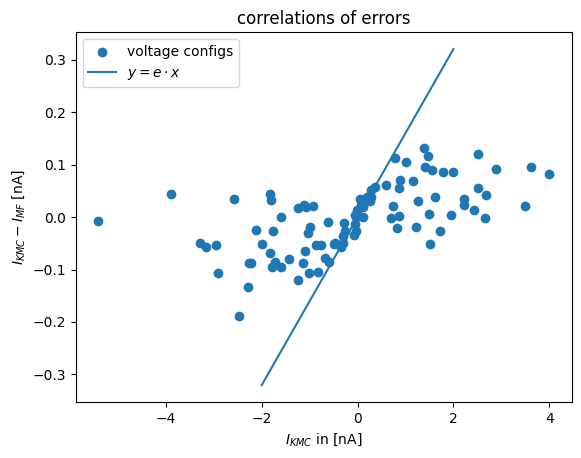

In [17]:
plt.scatter(kmc_currents, (kmc_currents - mf_currents), label = "voltage configs")
plt.xlabel("$I_{KMC}$ in [nA]")
plt.ylabel("$I_{KMC} - I_{MF}$ [nA]")

xs = np.linspace(-2,2)
plt.plot(xs, xs * CONST.electron_charge, label = "$y = e \cdot x$")
plt.legend()
plt.title("correlations of errors")

Text(0.5, 1.0, 'output current comparison')

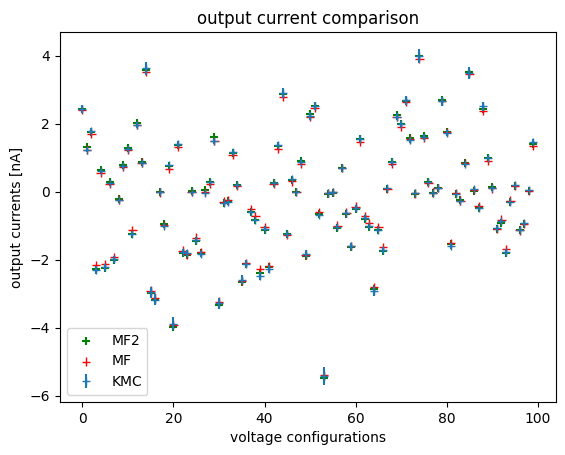

In [27]:
plt.errorbar(np.arange(100), kmc_currents, yerr = kmc_errs, linestyle = "", marker = "+", label = "KMC")
plt.scatter(np.arange(100), mf2_currents, marker = "+", label = "MF2", color = "g")
plt.scatter(np.arange(100), mf_currents, marker = "+", linestyle = "", label = "MF", color = "r")
plt.legend()
plt.xlabel("voltage configurations")
plt.ylabel("output currents [nA]")
plt.title("output current comparison")